In [1]:
from micrograd.engine import Value
from micrograd.nn import MLP
from micrograd.nn import Neuron
from math import sin
import random
import sys
from graphviz import Digraph

In [2]:
def trace(root):
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)
    build(root)
    return nodes, edges

def draw_dot(root, format='svg', rankdir='LR'):
    """
    format: png | svg | ...
    rankdir: TB (top to bottom graph) | LR (left to right)
    """
    assert rankdir in ['LR', 'TB']
    nodes, edges = trace(root)
    dot = Digraph(format=format, graph_attr={'rankdir': rankdir}) #, node_attr={'rankdir': 'TB'})
    
    for n in nodes:
        dot.node(name=str(id(n)), label = "{ data %.4f | grad %.4f }" % (n.data, n.grad), shape='record')
        if n._op:
            dot.node(name=str(id(n)) + n._op, label=n._op)
            dot.edge(str(id(n)) + n._op, str(id(n)))
    
    for n1, n2 in edges:
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)
    
    return dot

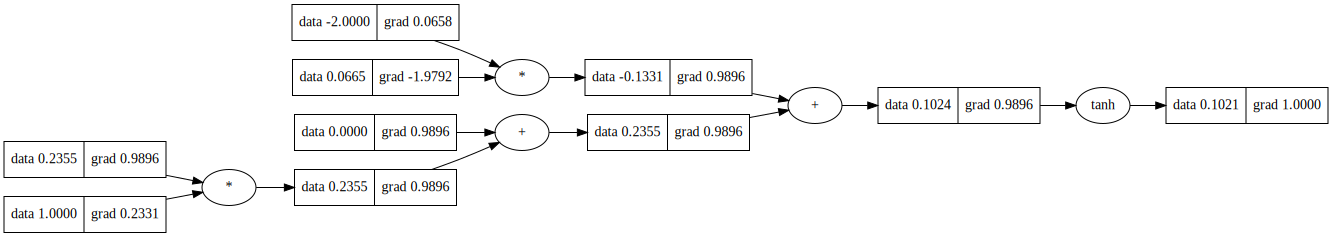

In [3]:
random.seed(1337)
n = Neuron(2)
x = [Value(1.0), Value(-2.0)]
y = n(x)
y.backward()

dot = draw_dot(y)
dot

In [4]:
sys.setrecursionlimit(10000)

def randomList(l):
    out = []
    for i in range(l):
        out.append(random.uniform(-1,1))
    return out

def smallSin(x):
    return Value(sin(x)/2.5)

def sub(A:list,B:list):
    out = []
    for a,b in zip(A,B):
        out.append(a-b)
    return out

def dotProd(A:list,B:list):
    out = []
    for a,b in zip(A,B):
        out.append(a*b)
    return sum(out)

def mean(A:list):
    return sum(A)/len(A)

class SGD():
    def __init__(self, model, lr):
        self.model = model
        self.lr = lr

    def stepGrads(self, model):
        for param in model.parameters():
            param.data -= self.lr * param.grad

inputs = randomList(100)
targets = list(map(smallSin, inputs))
inputs = list(map(lambda x : [Value(x)], inputs))
nn = MLP(1,[5,1])
optim = SGD(nn,1)
iterations = 100

for i in range(iterations):
    outs = list(map(nn, inputs))
    #print(outs)
    #print(targets)
    diff = sub(outs,targets)
    loss = dotProd(diff,diff)/len(outs)
    print(f"loss: {loss.data}")
    loss.backward()
    optim.lr = 1 - .9*i/100
    print(loss.data)
    print(f"new learning rate: {optim.lr}")
    optim.stepGrads(nn)
    if i != (iterations-1):
        nn.zero_grad()

print(f"Test with value of 2.2, model: {nn([2.2]).data}, actual: {smallSin(2.2).data}")
dot = draw_dot(loss)
dot

loss: 0.3345289411271153
0.3345289411271153
new learning rate: 1.0
loss: 0.3345289411271153
0.3345289411271153
new learning rate: 0.991
loss: 0.3345289411271153
0.3345289411271153
new learning rate: 0.982
loss: 0.3345289411271153
0.3345289411271153
new learning rate: 0.973
loss: 0.3345289411271153
0.3345289411271153
new learning rate: 0.964
loss: 0.3345289411271153
0.3345289411271153
new learning rate: 0.955
loss: 0.3345289411271153
0.3345289411271153
new learning rate: 0.946
loss: 0.3345289411271153
0.3345289411271153
new learning rate: 0.937
loss: 0.3345289411271153
0.3345289411271153
new learning rate: 0.9279999999999999
loss: 0.3345289411271153
0.3345289411271153
new learning rate: 0.919
loss: 0.3345289411271153
0.3345289411271153
new learning rate: 0.91
loss: 0.3345289411271153
0.3345289411271153
new learning rate: 0.901
loss: 0.3345289411271153
0.3345289411271153
new learning rate: 0.892
loss: 0.3345289411271153
0.3345289411271153
new learning rate: 0.883
loss: 0.3345289411271153